## Importing all the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

## Pre-processing

In [2]:
train_path="train"
test_path="test1"

In [3]:
images = [img for img in os.listdir(train_path)]

In [4]:
train_images, test_images = train_test_split(images, test_size=0.6)
images=train_images

In [5]:
Images_list=[]
Label_list=[]

In [6]:
paths_list=[]
for img in images:
    image_path = os.path.join(train_path,img)
    train_img = cv2.imread(image_path)
    scaled_img = cv2.resize(train_img, (64,64))
    std_scaled_img = scaled_img / 255
    Images_list.append(std_scaled_img.flatten())
    label=img.split('.')[0]
    if label=='cat':
        Label_list.append(0)
    else:
        Label_list.append(1)
Images_list=np.array(Images_list)

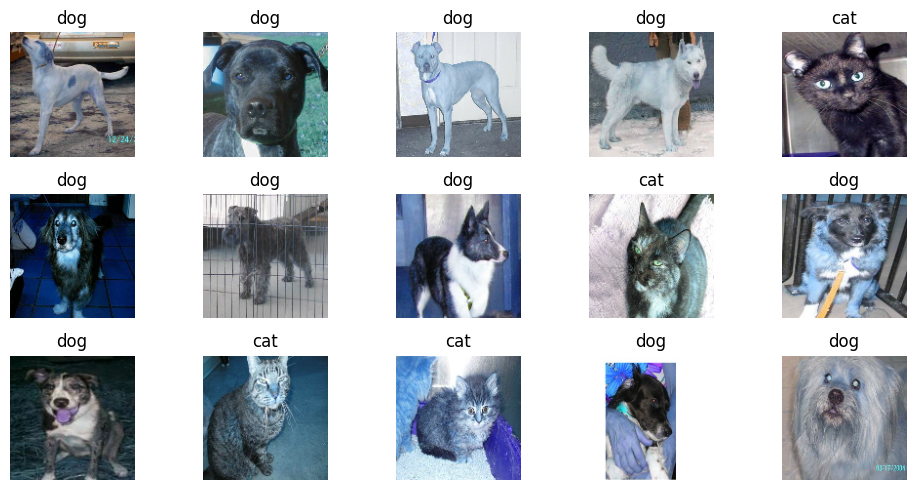

In [7]:
fig, ax = plt.subplots(3, 5, figsize=(10, 5))
    
for i, file in enumerate(random.sample(images,15)):
    row = i // 5
    col = i % 5
    img_path = os.path.join(train_path, file)
    img = cv2.imread(img_path)
    resized = cv2.resize(img, (128,128))
    # Display image
    ax[row, col].imshow(resized)
    ax[row, col].set_title(file.split('.')[0])
    ax[row, col].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [8]:
model = SVC(random_state=42)
model

SVC(random_state=42)

In [9]:
model.fit(Images_list, Label_list)

SVC(random_state=42)

In [10]:
final_submission={
    'ID' : []
}

In [13]:
test_images = [img for img in os.listdir('test1')]
Images_list_test=[]

In [19]:
for img in test_images:
    image_path = os.path.join('test1',img)
    test_img = cv2.imread(image_path)
    scaled_test_img = cv2.resize(test_img, (64,64))
    Images_list_test.append(scaled_test_img.flatten())
    id = img.split('.')[0]
    #print(id)
    final_submission["ID"].append(id)

In [20]:
y_pred=model.predict(Images_list_test)

In [ ]:
final_submission["Label"]=y_pred

In [ ]:
final_submission=pd.DataFrame(final_submission)
final_submission

In [ ]:
final_submission.to_csv("Submission.csv", index=False)